In [1]:
import os
import numpy as np
os.chdir("..")

from utils.get_synthetic_data_for_validation import get_datasets
from utils.vm_helpers import save_dict_to_json
from utils.gcp_helpers import save_json_to_bucket
from models.LinearInvariantRiskMinimization import LinearInvariantRiskMinimization
import pandas as pd

%pwd

'/home/jupyter/crisp'

In [2]:
from causalnex.structure import StructureModel
sm = StructureModel()

In [3]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

## Generate the Data from Example 4 with binomial variables

In [4]:
from synthetic.facebook_synthetic_data_generator import generator_example
data_path = 'data/synthetic'
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [5]:
# n_example = 4
# dim_inv=(0,4)
# dim_spu=(0,100)
n_example = 2
dim_inv=10
dim_spu=500
n_exp=int(3e2)
n_env=5
save_dir= data_path
test=False 

In [6]:
generator_example(n_example, dim_inv, dim_spu, n_exp, n_env ,save_dir, test)

Environments variables: {'E0': {'p': 0.95, 's': 0.3}, 'E1': {'p': 0.97, 's': 0.5}, 'E2': {'p': 0.99, 's': 0.7}, 'E3': {'p': 0.9496256709098816, 's': 0.6072887182235718}, 'E4': {'p': 0.9088477492332458, 's': 0.3528122007846832}}
Generated Synthetic Data according to the Facebook setup Example: 2
     df with  510  columns


('data/synthetic/data_fb_example_2_dim_inv_10_dim_spu_500_dim_unc_0_n_exp_300_n_env_5_test_False.pickle',
 Index(['Causal_0', 'Causal_1', 'Causal_2', 'Causal_3', 'Causal_4', 'Causal_5',
        'Causal_6', 'Causal_7', 'Causal_8', 'Causal_9',
        ...
        'Non_causal_493', 'Non_causal_494', 'Non_causal_495', 'Non_causal_496',
        'Non_causal_497', 'Non_causal_498', 'Non_causal_499', 'env_split',
        'Subj_ID', 'Target'],
       dtype='object', length=513))

In [7]:
# dim_inv_save = sum(dim_inv)
# dim_spu_save = sum(dim_spu)
dim_inv_save = dim_inv
dim_spu_save = dim_spu
data_name = "data_fb_example_%s_dim_inv_%s_dim_spu_%s_dim_unc_%s_n_exp_%s_n_env_%s_test_%s.pickle" %(n_example, dim_inv_save, dim_spu_save, 0, n_exp, n_env,test)
df_train = pd.read_pickle(os.path.join(data_path, data_name))

In [8]:
df_train

,Causal_0,Causal_1,Causal_2,Causal_3,Causal_4,Causal_5,Causal_6,Causal_7,Causal_8,Causal_9,...,Non_causal_493,Non_causal_494,Non_causal_495,Non_causal_496,Non_causal_497,Non_causal_498,Non_causal_499,env_split,Subj_ID,Target
0,-0.009706,-0.012106,-0.008077,-0.012309,-0.012793,-0.011325,-0.012545,-0.008211,-0.009430,-0.009657,...,-0.593157,-1.187049,-0.667036,-0.911874,-0.577621,-0.634658,-1.017803,0.0,0.0,0.0
1,-0.012387,-0.009227,-0.010245,-0.009632,-0.011878,-0.013934,-0.010079,-0.005670,-0.001598,-0.006885,...,-0.338866,-1.542100,-1.346920,-1.291221,-1.177236,-1.709806,-1.019542,0.0,1.0,0.0
2,-0.010821,-0.009626,-0.009229,-0.006317,-0.001474,-0.006092,-0.008283,-0.008338,-0.009392,-0.012442,...,-0.740417,-0.987107,-0.655154,-1.029277,-1.269387,-1.017161,-1.253782,0.0,2.0,0.0
3,-0.016009,-0.009587,-0.015096,-0.011516,-0.010453,-0.011003,-0.006942,-0.013134,-0.009046,-0.010339,...,-1.019702,-0.745323,-0.890783,-0.930620,-0.769131,-1.085748,-1.041546,0.0,3.0,0.0
4,0.012729,0.009938,0.013134,0.007541,0.010993,0.010675,0.009620,0.011140,0.002658,0.006217,...,1.188654,0.567448,1.471426,0.826149,1.560509,1.320764,1.159007,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.007278,-0.008337,-0.010099,-0.010493,-0.009271,-0.007973,-0.008232,-0.004308,-0.011969,-0.010217,...,-1.276935,-0.977037,-1.034086,-0.934356,-1.278732,-1.079025,-0.702186,4.0,295.0,0.0
296,-0.014964,-0.014108,-0.007820,-0.010859,-0.009496,-0.010963,-0.009060,-0.010763,-0.009991,-0.010309,...,-1.418782,-1.225353,-1.089487,-1.104076,-0.875930,-0.909393,-0.448961,4.0,296.0,0.0
297,0.007911,0.009967,0.006997,0.010174,0.008293,0.007849,0.011724,0.012584,0.006675,0.007376,...,1.513324,1.207486,1.043916,0.578360,0.680845,0.831921,1.278974,4.0,297.0,1.0
298,-0.008483,-0.009269,-0.006289,-0.010225,-0.003783,-0.009405,-0.008546,-0.010769,-0.013486,-0.013138,...,-0.743853,-1.035422,-1.452979,-1.395697,-1.706563,-1.058190,-1.340581,4.0,298.0,0.0


## Analyse the data with CausalNex

In [9]:
X = df_train
X = X.drop(columns=['Subj_ID', 'env_split'])
# X['Target'][X['Target']>=0] = np.ones(len(X['Target']))[X['Target']>=0]
# X['Target'][X['Target']<0] = np.zeros(len(X['Target']))[X['Target']<0]

In [30]:
# from causalnex.structure.notears import from_pandas_lasso

# sm_l = from_pandas_lasso(X, beta=0.001, tabu_child_nodes=list(X.keys().drop('Target')))

from causalnex.structure.notears import from_pandas

sm = from_pandas(X, tabu_child_nodes=list(X.keys().drop('Target')))


In [ ]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [10]:
temp = {}
for k, v in sm.adj.items():
    for i, j in v.items():
        temp[k+"_"+i] = np.abs(j["weight"])

ordered = sorted(zip(temp.values(), temp.keys()), reverse=True)

In [11]:
np.array(ordered)

array([], dtype=float64)

In [12]:
"test"

'test'

In [13]:
# import os
# import numpy as np
# os.chdir("..")

# from utils.get_synthetic_data_for_validation import get_datasets
# from utils.vm_helpers import save_dict_to_json
# from utils.gcp_helpers import save_json_to_bucket
# from models.LinearInvariantRiskMinimization import LinearInvariantRiskMinimization
# import pandas as pd
# import pickle

# %pwd

In [14]:
from causalnex.structure import DAGRegressor, DAGClassifier

In [15]:
X_sk = X[[k for i,k in enumerate(X.keys()) if k != 'Target' ]].values

In [16]:
y_sk = X['Target'].values
# y_sk = np.int64(X['Target'].values)

In [17]:
# reg = DAGRegressor(tabu_child_nodes=[i for i,k in enumerate(X.keys()) if k != 'Target' ], 
#                    dependent_target=True, enforce_dag=True, standardize=True)
reg = DAGClassifier(tabu_child_nodes=[i for i,k in enumerate(X.keys()) if k != 'Target' ],
                   dependent_target=True, enforce_dag=True, standardize=True)

In [18]:
reg.fit(X_sk,y_sk)

DAGClassifier(enforce_dag=True, standardize=True,
              tabu_child_nodes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                26, 27, 28, 29, ...],
              target_dist_type='bin')

In [19]:
names = [k for i,k in enumerate(X.keys()) if k != 'Target' ]

In [20]:
# sorted(zip(reg.feature_importances_, names), reverse=True)
sorted(zip(reg.feature_importances_[0], names), reverse=True)

[(1.119186282157898, 'Causal_2'),
 (1.1142690181732178, 'Causal_9'),
 (1.1074304580688477, 'Causal_3'),
 (1.1055402755737305, 'Causal_0'),
 (1.0984617471694946, 'Causal_5'),
 (1.0913166999816895, 'Causal_7'),
 (1.0734996795654297, 'Causal_8'),
 (1.0728975534439087, 'Causal_1'),
 (1.0560083389282227, 'Causal_4'),
 (0.9954824447631836, 'Causal_6'),
 (0.15745925903320312, 'Non_causal_187'),
 (0.14504021406173706, 'Non_causal_286'),
 (0.1329948455095291, 'Non_causal_93'),
 (0.1273660808801651, 'Non_causal_112'),
 (0.12679283320903778, 'Non_causal_234'),
 (0.121766097843647, 'Non_causal_435'),
 (0.12139856070280075, 'Non_causal_167'),
 (0.1195257380604744, 'Non_causal_242'),
 (0.11368802189826965, 'Non_causal_490'),
 (0.11298059672117233, 'Non_causal_418'),
 (0.1102241724729538, 'Non_causal_155'),
 (0.10558781772851944, 'Non_causal_37'),
 (0.10339821875095367, 'Non_causal_44'),
 (0.10214003175497055, 'Non_causal_303'),
 (0.10110774636268616, 'Non_causal_216'),
 (0.10090266168117523, 'Non_ca

In [18]:
# sorted(zip(reg.feature_importances_[2], reg.coef_[2]), reverse=True)

In [21]:
len(names)

510

In [22]:
reg.coef_.shape

(1, 510)

In [23]:
reg.feature_importances_

array([[1.10554028e+00, 1.07289755e+00, 1.11918628e+00, 1.10743046e+00,
        1.05600834e+00, 1.09846175e+00, 9.95482445e-01, 1.09131670e+00,
        1.07349968e+00, 1.11426902e+00, 1.16229076e-02, 9.80879646e-03,
        6.03683144e-02, 2.77467747e-03, 9.27217752e-02, 2.39815600e-02,
        9.73161086e-02, 9.57969725e-02, 1.60967037e-02, 8.08396563e-03,
        3.01639251e-02, 2.34378222e-02, 1.69556437e-03, 1.91526413e-02,
        1.99511182e-02, 6.90607652e-02, 3.75095895e-03, 1.91222522e-02,
        3.54182497e-02, 1.43656284e-02, 4.35733236e-03, 3.01755406e-02,
        5.72651513e-02, 2.76192348e-03, 7.56049529e-03, 7.46716484e-02,
        4.38434491e-03, 2.06211675e-02, 8.09795514e-04, 1.64685827e-02,
        2.42183618e-02, 6.94406703e-02, 3.59912440e-02, 4.71493155e-02,
        7.35869817e-03, 5.66818193e-03, 2.17840727e-02, 1.05587818e-01,
        4.01878409e-04, 2.29862109e-02, 2.40795352e-02, 6.97403997e-02,
        2.59784260e-03, 8.62730369e-02, 1.03398219e-01, 6.436312

In [24]:
np.unique(y_sk)

array([0., 1.])

In [25]:
reg.score(X_sk,y_sk)

1.0

In [26]:
def CDF_successful_causals_links(results):
    CDF = [0]
    for j in range(len(results)):
        if 'Causal' in results[j][0]:
            CDF.append(CDF[-1]+1)
        else:
            CDF.append(CDF[-1])
    return CDF


In [27]:
coef = np.sum(reg.feature_importances_,axis=0)
print(coef.shape)

(510,)


In [28]:
sorted_results = sorted(zip(names, coef), key=lambda x: abs(x[1]), reverse=True)

In [29]:
sorted_results

[('Causal_2', 1.119186282157898),
 ('Causal_9', 1.1142690181732178),
 ('Causal_3', 1.1074304580688477),
 ('Causal_0', 1.1055402755737305),
 ('Causal_5', 1.0984617471694946),
 ('Causal_7', 1.0913166999816895),
 ('Causal_8', 1.0734996795654297),
 ('Causal_1', 1.0728975534439087),
 ('Causal_4', 1.0560083389282227),
 ('Causal_6', 0.9954824447631836),
 ('Non_causal_187', 0.15745925903320312),
 ('Non_causal_286', 0.14504021406173706),
 ('Non_causal_93', 0.1329948455095291),
 ('Non_causal_112', 0.1273660808801651),
 ('Non_causal_234', 0.12679283320903778),
 ('Non_causal_435', 0.121766097843647),
 ('Non_causal_167', 0.12139856070280075),
 ('Non_causal_242', 0.1195257380604744),
 ('Non_causal_490', 0.11368802189826965),
 ('Non_causal_418', 0.11298059672117233),
 ('Non_causal_155', 0.1102241724729538),
 ('Non_causal_37', 0.10558781772851944),
 ('Non_causal_44', 0.10339821875095367),
 ('Non_causal_303', 0.10214003175497055),
 ('Non_causal_216', 0.10110774636268616),
 ('Non_causal_276', 0.10090266

In [33]:
CDF = CDF_successful_causals_links(sorted_results)
CDF_perc = CDF
for j in range(len(CDF)):
    CDF_perc[j] = CDF[j]/10

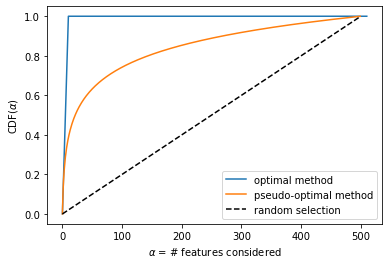

In [48]:
import matplotlib.pyplot as plt

plt.plot(CDF, label='optimal method')
plt.plot(np.arange(500),np.log((np.arange(500)+1))/np.log(501), label='pseudo-optimal method')
plt.plot(np.arange(500),np.arange(500)/500, 'k--', label='random selection')
plt.legend()
plt.xlabel(r'$\alpha$ = $\#$ features considered')
plt.ylabel(r'CDF($\alpha$)')
plt.savefig("/home/jupyter/crisp/results/comparison_CDF.png")